In [18]:
#Social_Network_Ads.csv

**Importing the libraries**

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.metrics import RocCurveDisplay

**Importing the dataset**

In [20]:
data = pd.read_csv("Social_Network_Ads.csv")
data.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


**Splitting the dataset into the Training set and Test set**

In [21]:
#Encoding the categorical columns
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])

#splitting the data
X = data.drop(columns=['User ID','Purchased'],axis=1)
Y = data['Purchased']

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=124)






**Feature Scaling**

In [22]:
scaler = MinMaxScaler(feature_range=(0,1))

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

**Fitting Random Forest to the Training set**

In [23]:
classifier = RandomForestClassifier(max_depth=1,random_state=14)
classifier.fit(x_train,y_train)

RandomForestClassifier(max_depth=1, random_state=14)

**Predicting the Test set results**

In [24]:
ypred = classifier.predict(x_test)
accuracy_score(y_test,ypred)*100

76.25

**Making the Confusion Matrix**

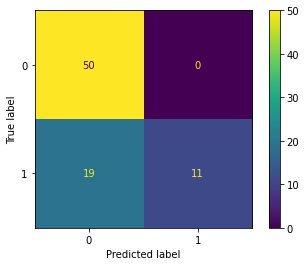

In [32]:
ConfusionMatrixDisplay.from_estimator(classifier,x_test,y_test)

**Visualising the Training set results**

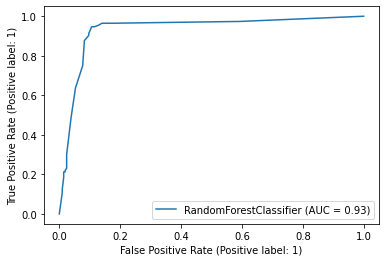

In [30]:
random_disp = RocCurveDisplay.from_estimator(classifier,x_train,y_train)

**Visualising the Test set results**

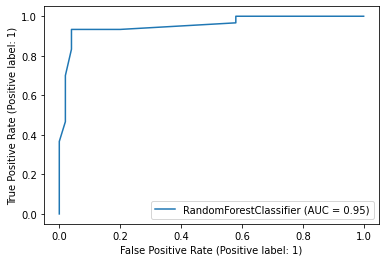

In [29]:
random_disp = RocCurveDisplay.from_estimator(classifier,x_test,y_test)